**Assignment 1 Set 6**

# **Deep Learning (S1-21_DSECLZG524) - DL Group 168 - SEC-3**

Group members: 


*   Ashwini BR - 2020fc04180@wilp.bits-pilani.ac.in
*   Ashutosh Kumar - 2020fc04341@wilp.bits-pilani.ac.in
*   Rahul Paul -2020fc04350@wilp.bits-pilani.ac.in





**Question No.1.** NLP Dataset: Dataset consisting of 20k reviews crawled from Tripadvisor. Please find your dataset from the link - https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews (Links to an external site.)    (6 marks)

**1. Import Libraries/Dataset (0 mark)** 

>1. Import the required libraries and the dataset (use Google Drive if required).
>2. Check the GPU available (recommended- use free GPU provided by Google Colab).

In [23]:
#Required Libraries and the Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/Data/tripadvisor_hotel_reviews.csv"

import pandas as pd
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from keras.layers import Dropout
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import keras
from keras import models
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
import tensorflow_hub as hub
from keras.layers import Activation, Dense 
#import keras_tuner as ktt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from imblearn.over_sampling import SMOTE
#mport livelossplot
import seaborn as sns
from time import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
#!pip install livelossplot
#!pip install -q -U keras-tuner

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title
#!pip install livelossplot
#!pip install -q -U keras-tuner

In [3]:
#Checking GPU availability
tf.test.gpu_device_name()

'/device:GPU:0'

**2. Data Visualization (0.75 mark)**

>1. Print at least two records from each class of the dataset, for a sanity check that labels match the text.
>2. Plot a bar graph of class distribution in the dataset. Each bar depicts the number of records belonging to a particular class in the dataset. (recommended - matplotlib/seaborn libraries)
>3. Any other visualizations that seem appropriate for this problem are encouraged but not necessary, for the points.
>4. Print the shapes of train and test data.

In [4]:
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
include =['object', 'float', 'int']
data.describe(include = include)

,Review,Rating
count,20491,20491.000000
unique,20491,NaN
top,hotel consistent latest revies used 1000 starp...,NaN
freq,1,NaN
mean,NaN,3.952223
std,NaN,1.233030
min,NaN,1.000000
25%,NaN,3.000000
50%,NaN,4.000000
75%,NaN,5.000000


In [6]:
# Two records from each class of the dataset
gk = data.groupby('Rating')
gk1 = pd.concat([gk.nth(0), gk.nth(1)], axis=0)
gk1.sort_values(by=['Rating'], inplace=True)
gk1

,Review
Rating,
1,horrible customer service hotel stay february ...
1,"noise airconditioner-a standard, arranged stay..."
2,ok nothing special charge diamond member hilto...
2,"poor value stayed monaco seattle july, nice ho..."
3,nice rooms not 4* experience hotel monaco seat...
3,nice hotel not nice staff hotel lovely staff q...
4,nice hotel expensive parking got good deal sta...
4,"excellent staff, housekeeping quality hotel ch..."
5,"unique, great stay, wonderful time hotel monac..."


In [ ]:
#@title
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = stopwords.words('english')
stop_word = set(stopwords.words('english'))


def  clean_text(text):
    text = text.str.lower()
    text = text.apply(lambda T: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", T))          
    return text

data['Review']= clean_text(data['Review'])
data['Review'] = data['Review'].str.replace('#','')
data['Review'] = data['Review'].str.lower()

punk_Remove = string.punctuation

def del_punk(text):
    return text.translate(str.maketrans('','',punk_Remove))

data['Review'] = data['Review'].apply(lambda T: del_punk(T))
def del_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_word])

data['Review'] = data['Review'].apply(lambda T: del_stopwords(T))
lemmatizer = WordNetLemmatizer()
wordnet_m = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}


def lemmat_pos_word(text):
    
    pos_tagger_text = nltk.pos_tag(text.split())
    
    return " ".join([lemmatizer.lemmatize(word, wordnet_m.get(pos[0],wordnet.NOUN)) for word,pos in pos_tagger_text])

data['Review'] = data['Review'].apply(lambda T : lemmat_pos_word(T))

(0.0, 9959.400000000001)

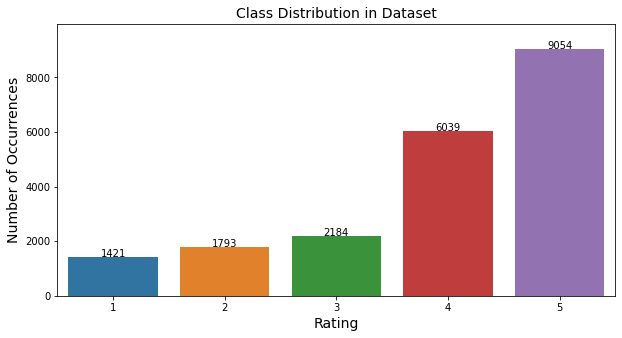

In [7]:
#Plot a bar graph of class distribution in the dataset. 
#Each bar depicts the number of records belonging to a particular class in the dataset.
total = len(data)
ax1 = plt.figure(figsize=(10,5))

g = sns.countplot(x='Rating', data=data)
g.set_title("Class Distribution in Dataset", fontsize=14)
g.set_xlabel("Rating", fontsize=14)
g.set_ylabel("Number of Occurrences", fontsize=14)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
#            '{:1.2f}%'.format(height/total*100),
            '{:1.0f}'.format(height),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1)

In [70]:
#Print the shapes of train and test data.
X = data['Review'].copy()
y = data['Rating'].copy()
X_train1, X_test1, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
print("Total Size of data is ",data.shape)
print("Shape of train data of Feature is ",X_train.shape)
print("Shape of test data Feature is ",X_test.shape)
print("Shape of train data Target is ",ytrain.shape)
print("Shape of test data Target is ",ytest.shape)

Total Size of data is  (20491, 2)
Shape of train data of Feature is  (16392, 128)
Shape of test data Feature is  (4099, 128)
Shape of train data Target is  (16392,)
Shape of test data Target is  (4099,)


**3. Data Pre-processing (0.25 mark)**
>1. Need for this Step- Since the models we use cannot accept string inputs or cannot be of the string format. We have to come up with a way of handling this step. The discussion of different ways of handling this step is out of the scope of this assignment.
>2. Please usethis pre-trained embedding layer  (Links to an external site.)from TensorFlow hub for this assignment. This link also has a code snippet on how to convert a sentence to a vector. Refer to that for further clarity on this subject.
>3. Bring the train and test data in the required format.

In [71]:
#Mapping from text to 128-dimensional embedding vectors.
embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")
X_train = embed(X_train1)
X_test = embed(X_test1)
ytrain = tf.keras.utils.to_categorical(ytrain, num_classes = 6)
ytest = tf.keras.utils.to_categorical(ytest, num_classes = 6)

In [10]:
print("Total Size of data is ",data.shape)
print("Shape of train data of Feature is ",X_train.shape)
print("Shape of test data Feature is ",X_test.shape)
print("Shape of train data Target is ",ytrain.shape)
print("Shape of test data Target is ",ytest.shape)

Total Size of data is  (20491, 2)
Shape of train data of Feature is  (16392, 128)
Shape of test data Feature is  (4099, 128)
Shape of train data Target is  (16392, 6)
Shape of test data Target is  (4099, 6)


**4. Model Building (0.2*5 = 1 mark)**
>1. Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
>2. Add L2 regularization to all the layers.
>3. Add one layer of dropout at the appropriate position and give reasons.
>4. Choose the appropriate activation function for all the layers.
>5. Print the model summary.

**Model with L2 Regularization and One layer of Dropout**

In [11]:
model_l2 = models.Sequential()
model_l2.add(keras.layers.Dense(128, activation='relu', kernel_regularizer='l2',name ='layer_1',input_shape=(128,)))
model_l2.add(keras.layers.Dense(96, activation='relu',kernel_regularizer='l2', name = 'layer_2'))
model_l2.add(Dropout(0.2))
model_l2.add(keras.layers.Dense(64, activation='relu',kernel_regularizer='l2', name = 'layer_3'))
model_l2.add(keras.layers.Dense(32, activation='relu',kernel_regularizer='l2', name = 'layer_4'))
model_l2.add(keras.layers.Dense(6, activation='softmax', kernel_regularizer='l2',name='output'))
model_l2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 128)               16512     
                                                                 
 layer_2 (Dense)             (None, 96)                12384     
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 layer_3 (Dense)             (None, 64)                6208      
                                                                 
 layer_4 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 6)                 198       
                                                                 
Total params: 37,382
Trainable params: 37,382
Non-traina

**Reason:**
1. As a Rule of Thumb, Number of neurons in hidden layer should be between the size of the input layer and the size of the output layer to avoid Over-Fitting.

2. Determining Dropout position is challenging but keeping in center of the hidden layers results best. (Studies performed in Hyperparameter Tuning)

3. Activation Relu is used for all hidden layer and Softmax is used for final layer as it is a multi-classification (multivariate) output.

**5. Model Compilation (0.25 mark)**
>1. Compile the model with the appropriate loss function.
>2. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
>3. Use accuracy as a metric.

In [25]:
model_l2.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy' ,
              metrics=['accuracy'] )

**Reason:**
>Adam optimizer utilizes the concept of momentum by adding fractions of previous gradients to the current one, also it uses the most popular algorithm i.e. gradient descent thus it is choosen with lower leraning rate and higher momentum.

**6. Model Training (0.5 + 0.25 = 0.75 mark)**
>1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
>2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

In [14]:
start = time()
NN_model = model_l2.fit(X_train, ytrain, epochs=100, 
                     validation_data=(X_test,ytest),batch_size=32, 
                     verbose=1)
end=time()
a=end-start

Epoch 1/100
513/513 [==============================] - 4s 8ms/step - loss: 1.1936 - accuracy: 0.5215 - val_loss: 1.1709 - val_accuracy: 0.5245
Epoch 2/100
513/513 [==============================] - 4s 8ms/step - loss: 1.1903 - accuracy: 0.5226 - val_loss: 1.1648 - val_accuracy: 0.5253
Epoch 3/100
513/513 [==============================] - 4s 8ms/step - loss: 1.1883 - accuracy: 0.5237 - val_loss: 1.1719 - val_accuracy: 0.5226
Epoch 4/100
513/513 [==============================] - 4s 8ms/step - loss: 1.1875 - accuracy: 0.5217 - val_loss: 1.1619 - val_accuracy: 0.5240
Epoch 5/100
513/513 [==============================] - 3s 6ms/step - loss: 1.1917 - accuracy: 0.5193 - val_loss: 1.1602 - val_accuracy: 0.5196
Epoch 6/100
513/513 [==============================] - 3s 5ms/step - loss: 1.1853 - accuracy: 0.5213 - val_loss: 1.1709 - val_accuracy: 0.5170
Epoch 7/100
513/513 [==============================] - 3s 5ms/step - loss: 1.1880 - accuracy: 0.5222 - val_loss: 1.1692 - val_accuracy: 0.5250

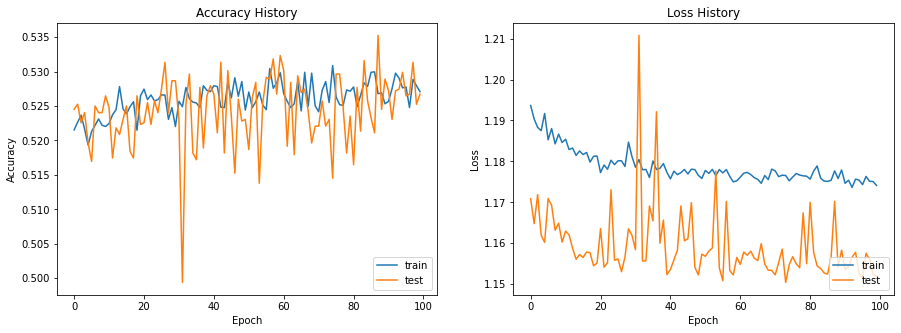

In [16]:
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
plt.plot(NN_model.history['accuracy'], label='train')
plt.plot(NN_model.history['val_accuracy'], label='test')
plt.legend(loc="lower right")
#plt.ylim(0.51, 0.54)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy History")

plt.subplot(1, 2, 2)
plt.plot(NN_model.history['loss'], label='train')
plt.plot(NN_model.history['val_loss'], label='test')
#plt.ylim(1.14, 1.18)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.legend(loc="lower right")

plt.show()

In [17]:
print ("Total time taken for training is : ",end="")
print ('%.2f sec'%a)

Total time taken for training is : 322.16 sec


**7. Model Evaluation (0.5 + 0.5 = 1 mark)**
>1. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
>2. Print the two most incorrectly classified records for each class in the test dataset.

In [72]:
predictions = model_l2.predict(X_test)
test_argmax = np.argmax(ytest, axis=1)
pred_argmax = np.argmax(predictions, axis=1)
print("=============================================================")
print("================== Classification Report ====================")
print("=============================================================")
print( classification_report(test_argmax,pred_argmax))


================== Classification Report ====================
              precision    recall  f1-score   support

           1       0.62      0.39      0.48       292
           2       0.34      0.39      0.36       333
           3       0.00      0.00      0.00       432
           4       0.36      0.27      0.31      1252
           5       0.61      0.88      0.72      1790

    accuracy                           0.53      4099
   macro avg       0.38      0.39      0.37      4099
weighted avg       0.45      0.53      0.47      4099



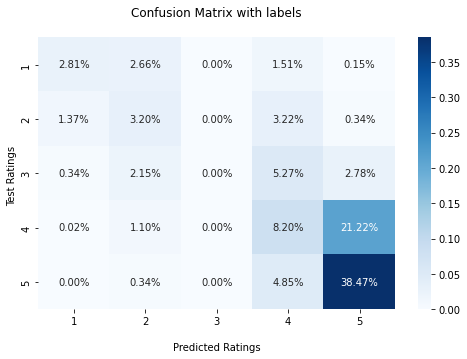

In [73]:
plt.rcParams["figure.figsize"] = (8,5)
cnf = confusion_matrix(ytest.argmax(axis=1), predictions.argmax(axis=1))
ax = sns.heatmap(cnf[0:5]/np.sum(cnf[0:5]), fmt='.2%',annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Ratings')
ax.set_ylabel('Test Ratings ');
ax.xaxis.set_ticklabels(['1','2', '3','4', '5'])
ax.yaxis.set_ticklabels(['1','2', '3','4', '5'])
plt.show()

**Summary:**
> Best Performing class is 5 and worst is 3 due to imbalance in dataset distribution.

##### 2. Print the two most incorrectly classified records for each class in the test dataset.

In [74]:
yt = ytest.argmax(axis=1)
prd = predictions.argmax(axis=1)

In [75]:
ps15 = []
ps51 = []
ps25 = []
ps52 = []
ps14 = []
ps41 = []
ps31 = []
ps35 = []
ps24 = []
ps42 = []
def apd(a,b,c):
  ab = []
  ab.append(a)
  ab.append(b)
  ab.append(c)
  return ab
for i in range(0,len(yt)):
    if (yt[i]==1 and prd[i]==5):
      ps15.append(apd(i,yt[i],prd[i]))
    if (yt[i]==5 and prd[i]==1):
      ps51.append(apd(i,yt[i],prd[i]))
    if (yt[i]==2 and prd[i]==5):
      ps25.append(apd(i,yt[i],prd[i]))
    if (yt[i]==5 and prd[i]==2):
      ps52.append(apd(i,yt[i],prd[i]))
    if (yt[i]==1 and prd[i]==4):
      ps14.append(apd(i,yt[i],prd[i]))
    if (yt[i]==4 and prd[i]==1):
      ps41.append(apd(i,yt[i],prd[i]))
    if (yt[i]==3 and prd[i]==1):
      ps31.append(apd(i,yt[i],prd[i]))
    if (yt[i]==3 and prd[i]==5):
      ps35.append(apd(i,yt[i],prd[i]))
    if (yt[i]==2 and prd[i]==4):
      ps24.append(apd(i,yt[i],prd[i]))
    if (yt[i]==4 and prd[i]==2):
      ps42.append(apd(i,yt[i],prd[i]))


In [ ]:
X_test2 = X_test1.tolist()

In [100]:
inc15 =[ps15[0][1],ps15[0][2],X_test2[ps15[0][0]]]
inc14 =[ps14[0][1],ps14[0][2],X_test2[ps14[0][0]]]
inc25 =[ps25[0][1],ps25[0][2],X_test2[ps25[0][0]]]
inc24 =[ps24[0][1],ps24[0][2],X_test2[ps24[0][0]]]
inc31 =[ps31[0][1],ps31[0][2],X_test2[ps31[0][0]]]
inc35 =[ps35[0][1],ps35[0][2],X_test2[ps35[0][0]]]
inc41 =[ps41[0][1],ps41[0][2],X_test2[ps41[0][0]]]
inc42 =[ps42[0][1],ps42[0][2],X_test2[ps42[0][0]]]
#inc51 =[ps51[0][1],ps51[0][2],X_test2[ps51[0][0]]]
inc52 =[ps52[0][1],ps52[0][2],X_test2[ps52[0][0]]]
inc522 =[ps52[1][1],ps52[1][2],X_test2[ps52[1][0]]]

In [101]:
lstinc = [inc15,inc14,inc25,inc24,inc31,inc35,inc41,inc42,inc52,inc522]
    
dfinc = pd.DataFrame(lstinc, columns =['Test Rating', 'Predicted Rating', 'Review'])
dfinc

,Test Rating,Predicted Rating,Review
0,1,5,terrible loved infinity pool family took trip ...
1,1,4,nice grounds pathetic service standards perspe...
2,2,5,great hotel 21 w hotel pretentious geared 20 y...
3,2,4,overpriced not trendy research thought hip tre...
4,3,1,"no tipping, stay 4 nights hotel 5 star tipping..."
5,3,5,ok hotel good location stayed night way beijin...
6,4,1,"loved beach loved beach sand fleas bite, recom..."
7,4,2,good flaw stayed hotel boyfriend 4 nights augu...
8,5,2,great service little expensive beautifull hote...
9,5,2,enjoyable convenient stayed 3 nights fiance la...


**Hyperparameter Tuning-** Build two more models by changing the following hyperparameters one at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. (1 + 1 = 2 marks)

>1. Regularization: Train a model without regularization
>2. Dropout:Change the position and value of dropout layer

**Model without regularization**

In [ ]:
model_nl2 = models.Sequential()
model_nl2.add(keras.layers.Dense(128, activation='relu',name ='layer_1',input_shape=(128,)))
model_nl2.add(keras.layers.Dense(96, activation='relu', name = 'layer_2'))
model_nl2.add(Dropout(0.2))
model_nl2.add(keras.layers.Dense(64, activation='relu', name = 'layer_3'))
model_nl2.add(keras.layers.Dense(32, activation='relu', name = 'layer_4'))
model_nl2.add(keras.layers.Dense(6, activation='softmax',name='output'))
model_nl2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 128)               16512     
                                                                 
 layer_2 (Dense)             (None, 96)                12384     
                                                                 
 dropout_16 (Dropout)        (None, 96)                0         
                                                                 
 layer_3 (Dense)             (None, 64)                6208      
                                                                 
 layer_4 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 6)                 198       
                                                                 
Total params: 37,382
Trainable params: 37,382
Non-tra

In [ ]:
model_nl2.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy' ,
              metrics=['accuracy'] )
NN_model_nl2 = model_nl2.fit(X_train, ytrain, epochs=100, 
                     validation_data=(X_test,ytest),batch_size=32, 
                     verbose=1)

Epoch 1/100
513/513 [==============================] - 3s 4ms/step - loss: 1.0778 - accuracy: 0.5215 - val_loss: 0.9711 - val_accuracy: 0.5645
Epoch 2/100
513/513 [==============================] - 2s 3ms/step - loss: 0.9815 - accuracy: 0.5640 - val_loss: 0.9428 - val_accuracy: 0.5894
Epoch 3/100
513/513 [==============================] - 2s 3ms/step - loss: 0.9621 - accuracy: 0.5701 - val_loss: 0.9289 - val_accuracy: 0.5897
Epoch 4/100
513/513 [==============================] - 2s 3ms/step - loss: 0.9501 - accuracy: 0.5760 - val_loss: 0.9301 - val_accuracy: 0.5948
Epoch 5/100
513/513 [==============================] - 2s 3ms/step - loss: 0.9416 - accuracy: 0.5819 - val_loss: 0.9367 - val_accuracy: 0.5853
Epoch 6/100
513/513 [==============================] - 2s 3ms/step - loss: 0.9320 - accuracy: 0.5841 - val_loss: 0.9282 - val_accuracy: 0.5919
Epoch 7/100
513/513 [==============================] - 2s 3ms/step - loss: 0.9186 - accuracy: 0.5933 - val_loss: 0.9320 - val_accuracy: 0.5909

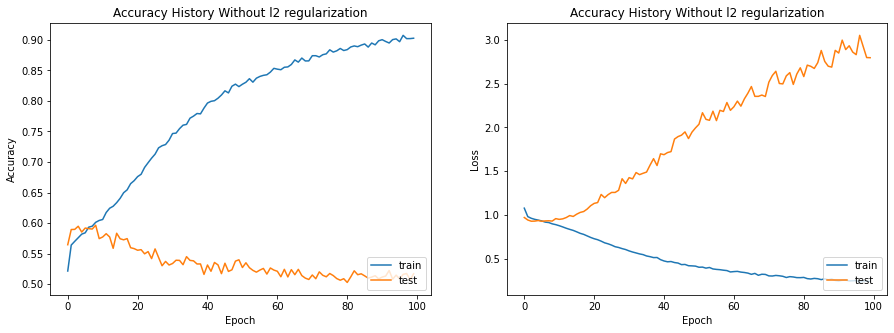

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
plt.plot(NN_model_nl2.history['accuracy'], label='train')
plt.plot(NN_model_nl2.history['val_accuracy'], label='test')
plt.legend(loc="lower right")
#plt.ylim(0.51, 0.54)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy History Without l2 regularization")

plt.subplot(1, 2, 2)
plt.plot(NN_model_nl2.history['loss'], label='train')
plt.plot(NN_model_nl2.history['val_loss'], label='test')
#plt.ylim(1.14, 1.18)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Accuracy History Without l2 regularization")
plt.legend(loc="lower right")

plt.show()

In [ ]:
score_nl2 = model_nl2.evaluate(X_test,ytest,verbose=0)
score_l2 = model_l2.evaluate(X_test,ytest,verbose=0)
print("Accuracy of Model with Regularization: ",round(score_l2[1]*100,3),"%")
print("Accuracy of Model without Regularization: ",round(score_nl2[1]*100,3),"%")

Accuracy of Model with Regularization:  52.745 %
Accuracy of Model without Regularization:  51.696 %


 **Drop Out Tuning**
 >1. Swaping Dropout position after First, Third & Fourth layer.
 >2. Increase the Dropout value to 0.5 from 0.2 after second position.

In [ ]:
model_dp1 = models.Sequential()
model_dp1.add(keras.layers.Dense(128, activation='relu',kernel_regularizer='l2',name ='layer_1',input_shape=(128,)))
model_dp1.add(Dropout(0.2))
model_dp1.add(keras.layers.Dense(96, activation='relu',kernel_regularizer='l2', name = 'layer_2'))
model_dp1.add(keras.layers.Dense(64, activation='relu',kernel_regularizer='l2', name = 'layer_3'))
model_dp1.add(keras.layers.Dense(32, activation='relu',kernel_regularizer='l2', name = 'layer_4'))
model_dp1.add(keras.layers.Dense(6, activation='softmax',kernel_regularizer='l2',name='output'))
model_dp1.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 layer_2 (Dense)             (None, 96)                12384     
                                                                 
 layer_3 (Dense)             (None, 64)                6208      
                                                                 
 layer_4 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 6)                 198       
                                                                 
Total params: 37,382
Trainable params: 37,382
Non-tra

In [ ]:
model_dp1.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy' ,
              metrics=['accuracy'] )
NN_model_dp1 = model_dp1.fit(X_train, ytrain, epochs=100, 
                     validation_data=(X_test,ytest),batch_size=32, 
                     verbose=1)

Epoch 1/100
513/513 [==============================] - 3s 4ms/step - loss: 1.8557 - accuracy: 0.4853 - val_loss: 1.2780 - val_accuracy: 0.5182
Epoch 2/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2744 - accuracy: 0.5168 - val_loss: 1.2529 - val_accuracy: 0.5038
Epoch 3/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2447 - accuracy: 0.5157 - val_loss: 1.2088 - val_accuracy: 0.5206
Epoch 4/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2307 - accuracy: 0.5180 - val_loss: 1.2331 - val_accuracy: 0.4994
Epoch 5/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2216 - accuracy: 0.5145 - val_loss: 1.1967 - val_accuracy: 0.5226
Epoch 6/100
513/513 [==============================] - 1s 3ms/step - loss: 1.2150 - accuracy: 0.5199 - val_loss: 1.2222 - val_accuracy: 0.5150
Epoch 7/100
513/513 [==============================] - 3s 6ms/step - loss: 1.2073 - accuracy: 0.5188 - val_loss: 1.1844 - val_accuracy: 0.5313

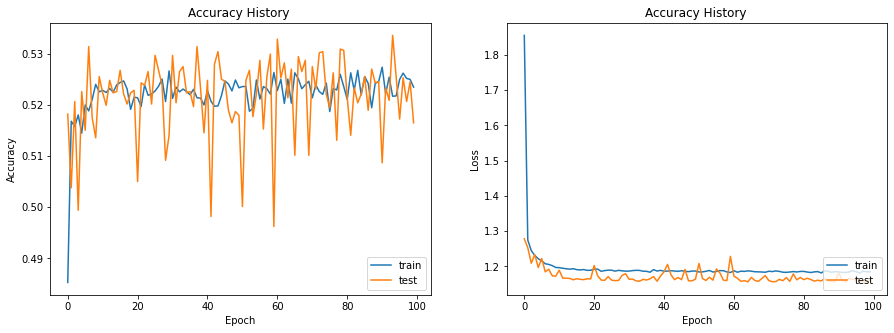

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
plt.plot(NN_model_dp1.history['accuracy'], label='train')
plt.plot(NN_model_dp1.history['val_accuracy'], label='test')
plt.legend(loc="lower right")
#plt.ylim(0.51, 0.54)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy History ")
plt.subplot(1, 2, 2)
plt.plot(NN_model_dp1.history['loss'], label='train')
plt.plot(NN_model_dp1.history['val_loss'], label='test')
#plt.ylim(1.14, 1.18)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Accuracy History ")
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_dp2 = models.Sequential()
model_dp2.add(keras.layers.Dense(128, activation='relu',kernel_regularizer='l2',name ='layer_1',input_shape=(128,)))
model_dp2.add(keras.layers.Dense(96, activation='relu',kernel_regularizer='l2', name = 'layer_2'))
model_dp2.add(keras.layers.Dense(64, activation='relu',kernel_regularizer='l2', name = 'layer_3'))
model_dp2.add(Dropout(0.2))
model_dp2.add(keras.layers.Dense(32, activation='relu',kernel_regularizer='l2', name = 'layer_4'))
model_dp2.add(keras.layers.Dense(6, activation='softmax',kernel_regularizer='l2',name='output'))
model_dp2.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 128)               16512     
                                                                 
 layer_2 (Dense)             (None, 96)                12384     
                                                                 
 layer_3 (Dense)             (None, 64)                6208      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 layer_4 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 6)                 198       
                                                                 
Total params: 37,382
Trainable params: 37,382
Non-tra

In [ ]:
model_dp2.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy' ,
              metrics=['accuracy'] )
NN_model_dp2 = model_dp2.fit(X_train, ytrain, epochs=100, 
                     validation_data=(X_test,ytest),batch_size=32, 
                     verbose=1)

Epoch 1/100
513/513 [==============================] - 4s 7ms/step - loss: 1.8054 - accuracy: 0.4716 - val_loss: 1.2526 - val_accuracy: 0.5065
Epoch 2/100
513/513 [==============================] - 3s 6ms/step - loss: 1.2547 - accuracy: 0.5126 - val_loss: 1.2098 - val_accuracy: 0.5196
Epoch 3/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2296 - accuracy: 0.5151 - val_loss: 1.2050 - val_accuracy: 0.5035
Epoch 4/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2158 - accuracy: 0.5185 - val_loss: 1.1913 - val_accuracy: 0.5113
Epoch 5/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2131 - accuracy: 0.5171 - val_loss: 1.1979 - val_accuracy: 0.5045
Epoch 6/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2084 - accuracy: 0.5196 - val_loss: 1.1755 - val_accuracy: 0.5209
Epoch 7/100
513/513 [==============================] - 1s 3ms/step - loss: 1.2013 - accuracy: 0.5181 - val_loss: 1.2269 - val_accuracy: 0.4982

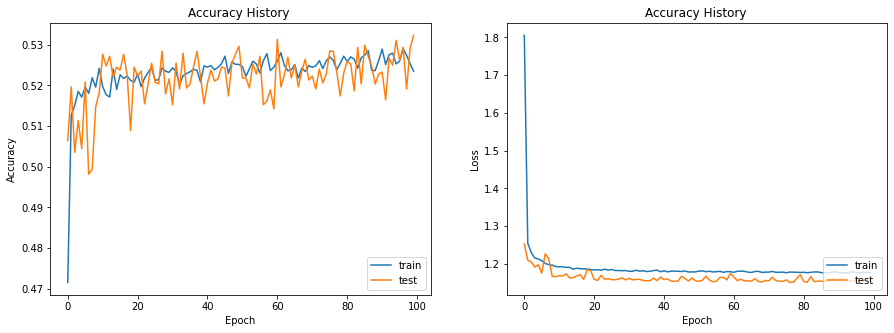

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
plt.plot(NN_model_dp2.history['accuracy'], label='train')
plt.plot(NN_model_dp2.history['val_accuracy'], label='test')
plt.legend(loc="lower right")
#plt.ylim(0.51, 0.54)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy History ")
plt.subplot(1, 2, 2)
plt.plot(NN_model_dp2.history['loss'], label='train')
plt.plot(NN_model_dp2.history['val_loss'], label='test')
#plt.ylim(1.14, 1.18)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Accuracy History ")
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_dp3 = models.Sequential()
model_dp3.add(keras.layers.Dense(128, activation='relu',kernel_regularizer='l2',name ='layer_1',input_shape=(128,)))
model_dp3.add(keras.layers.Dense(96, activation='relu',kernel_regularizer='l2', name = 'layer_2'))
model_dp3.add(keras.layers.Dense(64, activation='relu',kernel_regularizer='l2', name = 'layer_3'))
model_dp3.add(keras.layers.Dense(32, activation='relu',kernel_regularizer='l2', name = 'layer_4'))
model_dp3.add(Dropout(0.2))
model_dp3.add(keras.layers.Dense(6, activation='softmax',kernel_regularizer='l2',name='output'))
model_dp3.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 128)               16512     
                                                                 
 layer_2 (Dense)             (None, 96)                12384     
                                                                 
 layer_3 (Dense)             (None, 64)                6208      
                                                                 
 layer_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 output (Dense)              (None, 6)                 198       
                                                                 
Total params: 37,382
Trainable params: 37,382
Non-tra

In [ ]:
model_dp3.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy' ,
              metrics=['accuracy'] )
NN_model_dp3 = model_dp3.fit(X_train, ytrain, epochs=100, 
                     validation_data=(X_test,ytest),batch_size=32, 
                     verbose=1)

Epoch 1/100
513/513 [==============================] - 4s 6ms/step - loss: 1.8422 - accuracy: 0.4704 - val_loss: 1.2799 - val_accuracy: 0.4940
Epoch 2/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2772 - accuracy: 0.5066 - val_loss: 1.2187 - val_accuracy: 0.5231
Epoch 3/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2428 - accuracy: 0.5121 - val_loss: 1.2125 - val_accuracy: 0.5077
Epoch 4/100
513/513 [==============================] - 1s 3ms/step - loss: 1.2314 - accuracy: 0.5138 - val_loss: 1.1988 - val_accuracy: 0.5223
Epoch 5/100
513/513 [==============================] - 1s 3ms/step - loss: 1.2234 - accuracy: 0.5139 - val_loss: 1.1938 - val_accuracy: 0.5040
Epoch 6/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2133 - accuracy: 0.5167 - val_loss: 1.1784 - val_accuracy: 0.5216
Epoch 7/100
513/513 [==============================] - 1s 3ms/step - loss: 1.2109 - accuracy: 0.5157 - val_loss: 1.1765 - val_accuracy: 0.5174

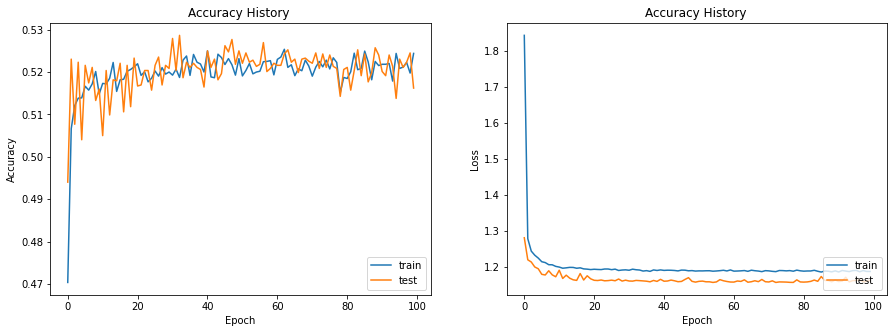

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
plt.plot(NN_model_dp3.history['accuracy'], label='train')
plt.plot(NN_model_dp3.history['val_accuracy'], label='test')
plt.legend(loc="lower right")
#plt.ylim(0.51, 0.54)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy History ")
plt.subplot(1, 2, 2)
plt.plot(NN_model_dp3.history['loss'], label='train')
plt.plot(NN_model_dp3.history['val_loss'], label='test')
#plt.ylim(1.14, 1.18)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Accuracy History ")
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_dp5 = models.Sequential()
model_dp5.add(keras.layers.Dense(128, activation='relu',kernel_regularizer='l2',name ='layer_1',input_shape=(128,)))
model_dp5.add(keras.layers.Dense(96, activation='relu',kernel_regularizer='l2', name = 'layer_2'))
model_dp5.add(Dropout(0.5))
model_dp5.add(keras.layers.Dense(64, activation='relu',kernel_regularizer='l2', name = 'layer_3'))
model_dp5.add(keras.layers.Dense(32, activation='relu',kernel_regularizer='l2', name = 'layer_4'))
model_dp5.add(keras.layers.Dense(6, activation='softmax',kernel_regularizer='l2',name='output'))
model_dp5.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 128)               16512     
                                                                 
 layer_2 (Dense)             (None, 96)                12384     
                                                                 
 dropout_24 (Dropout)        (None, 96)                0         
                                                                 
 layer_3 (Dense)             (None, 64)                6208      
                                                                 
 layer_4 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 6)                 198       
                                                                 
Total params: 37,382
Trainable params: 37,382
Non-tra

In [ ]:
model_dp5.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy' ,
              metrics=['accuracy'] )
NN_model_dp5 = model_dp5.fit(X_train, ytrain, epochs=100, 
                     validation_data=(X_test,ytest),batch_size=32, 
                     verbose=1)

Epoch 1/100
513/513 [==============================] - 3s 4ms/step - loss: 1.8933 - accuracy: 0.4757 - val_loss: 1.3104 - val_accuracy: 0.5177
Epoch 2/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2730 - accuracy: 0.5125 - val_loss: 1.2214 - val_accuracy: 0.5030
Epoch 3/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2425 - accuracy: 0.5105 - val_loss: 1.1950 - val_accuracy: 0.5138
Epoch 4/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2248 - accuracy: 0.5113 - val_loss: 1.1873 - val_accuracy: 0.5128
Epoch 5/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2180 - accuracy: 0.5149 - val_loss: 1.1893 - val_accuracy: 0.5116
Epoch 6/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2159 - accuracy: 0.5150 - val_loss: 1.1861 - val_accuracy: 0.5082
Epoch 7/100
513/513 [==============================] - 2s 3ms/step - loss: 1.2102 - accuracy: 0.5137 - val_loss: 1.1785 - val_accuracy: 0.5113

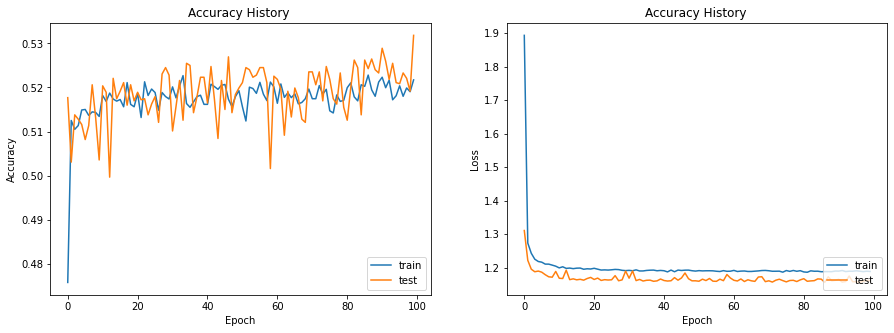

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
plt.plot(NN_model_dp5.history['accuracy'], label='train')
plt.plot(NN_model_dp5.history['val_accuracy'], label='test')
plt.legend(loc="lower right")
#plt.ylim(0.51, 0.54)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy History ")
plt.subplot(1, 2, 2)
plt.plot(NN_model_dp5.history['loss'], label='train')
plt.plot(NN_model_dp5.history['val_loss'], label='test')
#plt.ylim(1.14, 1.18)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Accuracy History ")
plt.legend(loc="lower right")
plt.show()

In [ ]:
score_dp1 = model_dp1.evaluate(X_test,ytest,verbose=0)
score_dp2 = model_dp2.evaluate(X_test,ytest,verbose=0)
score_dp3 = model_dp3.evaluate(X_test,ytest,verbose=0)
score_dp5 = model_dp5.evaluate(X_test,ytest,verbose=0)
print("Dropout with 0.2 Value After First Hidden layer: ",round(score_dp1[1]*100,2),"%")
print("Dropout with 0.2 Value After Second Hidden layer: ",round(score_l2[1]*100,3),"%")
print("Dropout with 0.5 Value After Second Hidden layer: ",round(score_dp5[1]*100,3),"%")
print("Dropout with 0.2 Value After Third Hidden layer: ",round(score_dp2[1]*100,3),"%")
print("Dropout with 0.2 Value After Fourth Hidden layer: ",round(score_dp3[1]*100,3),"%")

Dropout with 0.2 Value After First Hidden layer:  51.65 %
Dropout with 0.2 Value After Second Hidden layer:  52.745 %
Dropout with 0.5 Value After Second Hidden layer:  53.184 %
Dropout with 0.2 Value After Third Hidden layer:  53.232 %
Dropout with 0.2 Value After Fourth Hidden layer:  51.622 %


# **Reason:**
>1. Training a model without L2 Regularization leads to Overfitting data which is visible from test & train accuracy plot with respect to epoch.
>2. Increase in Dropout Value or Moving Droput Position is improving the accuracy of the model marginally.

## **Appendix:**

Hyperparameter Tuning using RandomSearch

In [ ]:
#Using SMOT to balance the imbalance
X = data['Review'].copy()
y = data['Rating'].copy()
sm = SMOTE(random_state=2)
Xt_train, Xt_test, yttrain, yttest = train_test_split(X, y, test_size=0.2)
embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")
Xt_train = embed(Xt_train)
Xt_test = embed(Xt_test)
X_resample, y_resample = sm.fit_resample(Xt_train, yttrain)
model = models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer='l2',name ='layer_1',input_shape=(128,)))
model.add(keras.layers.Dense(96, activation='relu',kernel_regularizer='l2', name = 'layer_2'))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(64, activation='relu',kernel_regularizer='l2', name = 'layer_3'))
model.add(keras.layers.Dense(32, activation='relu',kernel_regularizer='l2', name = 'layer_4'))
model.add(keras.layers.Dense(6, activation='softmax', kernel_regularizer='l2',name='output'))
model.summary()
y_resample = tf.keras.utils.to_categorical(y_resample, num_classes = 6)
yttest = tf.keras.utils.to_categorical(yttest, num_classes = 6)
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy' ,
              metrics=['accuracy'] )
NN_model_sm = model.fit(X_resample, y_resample, epochs=100, 
                     validation_data=(Xt_test,yttest),batch_size=32,verbose=1)

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=128,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(6, activation='softmax',kernel_regularizer='l2'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = ktt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='proje',
    project_name='DL_Assignment')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train, ytrain,
             epochs=100,
             validation_data=(X_test, ytest))

Trial 5 Complete [00h 13m 53s]
val_accuracy: 0.5892493923505148

Best val_accuracy So Far: 0.5892493923505148
Total elapsed time: 01h 25m 00s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in proje/DL_Assignment
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 1
units_0: 256
learning_rate: 0.001
units_1: 352
units_2: 448
units_3: 480
units_4: 320
units_5: 64
units_6: 512
units_7: 320
Score: 0.5892493923505148
Trial summary
Hyperparameters:
num_layers: 8
units_0: 96
learning_rate: 0.001
units_1: 32
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
Score: 0.5885175069173177
Trial summary
Hyperparameters:
num_layers: 7
units_0: 160
learning_rate: 0.0001
units_1: 320
units_2: 320
units_3: 512
units_4: 416
units_5: 416
units_6: 96
units_7: 128
Score: 0.5877043008804321
Trial summary
Hyperparameters:
num_layers: 3
units_0: 512
learning_rate: 0.001
units_1: 288
units_2: 64
units_3: 352
units_4: 480
units_5: 128
units_6: 160
units_7: 224
Score: 0.5876229802767435
Trial summary
Hyperparameters:
num_layers: 8
units_0: 224
learning_rate: 0.0001
units_1: 32
units_2: 64
unit